Reproduce conditinal and marginal distributions associated with multivariate Gaussian by sampling (Figure 2.9).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
μ = np.array([0.5, 0.5])

In [3]:
λ_1 = 0.02   
λ_2 = 0.02 / 36

In [4]:
λ_1, λ_2

(0.02, 0.0005555555555555556)

In [5]:
u_1 = np.array([1.0, 1.0]).reshape(-1, 1)
u_2 = np.array([-1.0, 1.0]).reshape(-1, 1)

In [6]:
U = np.concatenate((u_1, u_2), axis=1)
U

array([[ 1., -1.],
       [ 1.,  1.]])

In [7]:
Σ = U @ np.diag([λ_1, λ_2]) @ U.T
Σ

array([[0.02055556, 0.01944444],
       [0.01944444, 0.02055556]])

In [8]:
Λ = np.linalg.inv(Σ)
Λ

array([[ 462.5, -437.5],
       [-437.5,  462.5]])

In [9]:
p = multivariate_normal(mean=μ, cov=Σ)

In [10]:
x = p.rvs(1_000_000)

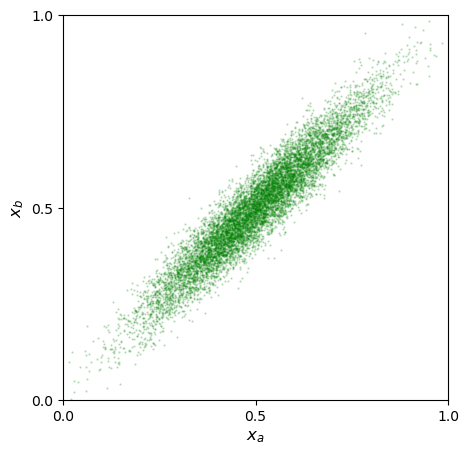

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(x[:10_000, 0], x[:10_000, 1], color='g', marker='.', s=2, alpha=0.2)
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.axis('square')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(r'$x_a$', fontsize=12)
plt.ylabel(r'$x_b$', fontsize=12)
plt.show()

# Marginal distribution

In [12]:
x.shape

(1000000, 2)

In [13]:
marg = x[:, 0]

In [14]:
marg.mean()

0.5001941784982702

In [15]:
μ[0]  # (2.92)

0.5

In [16]:
marg.var()

0.02059017537626298

In [17]:
Σ[0, 0]  # (2.93)

0.020555555555555556

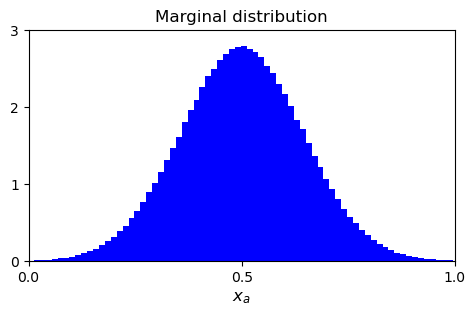

In [18]:
plt.figure(figsize=(5.5, 3))
plt.hist(marg, bins=100, density=True, color='b')
plt.xlim(0, 1)
plt.ylim(0, 3)
plt.xticks([0, 0.5, 1])
plt.yticks(np.arange(0, 4, 1))
plt.xlabel(r'$x_a$', fontsize=12)
plt.title('Marginal distribution')
plt.show()

# Conditional distribution for $x_b = 0.7$

In [19]:
x_b = 0.7

In [20]:
idx = np.sqrt((x[:, 1] - x_b) ** 2) < 0.01
idx.sum()

20877

In [21]:
cond = x[idx, 0]

In [22]:
cond.mean()

0.6893582989805415

In [23]:
cond.var()

0.002211370601795964

Calculate $μ_{a|b}$ based on (2.97)

In [24]:
μ[0] - (Λ[0, 0] ** (-1)) * Λ[0, 1] * (x_b - μ[1])  # (2.97)

0.6891891891891891

In [25]:
Λ[0, 0] ** (-1)  # (2.73)

0.0021621621621621626

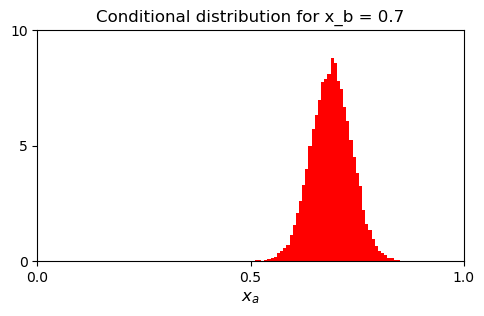

In [26]:
plt.figure(figsize=(5.5, 3))
plt.hist(cond, bins=50, density=True, color='r')
plt.xlim(0, 1)
plt.ylim(0, 10)
plt.xticks([0, 0.5, 1])
plt.yticks([0, 5, 10])
plt.xlabel(r'$x_a$', fontsize=12)
plt.title('Conditional distribution for x_b = 0.7')
plt.show()

# Final plot

In [27]:
def calculate_hist(data):
    cnts, bins = np.histogram(data, bins=np.linspace(0.0, 1.0, 60))
    pdf = cnts / len(data) / np.median(np.diff(bins))
    x = (bins[:-1] + bins[1:]) / 2
    return x, pdf

In [28]:
x_marg, pdf_marg = calculate_hist(marg)
x_cond, pdf_cond = calculate_hist(cond)

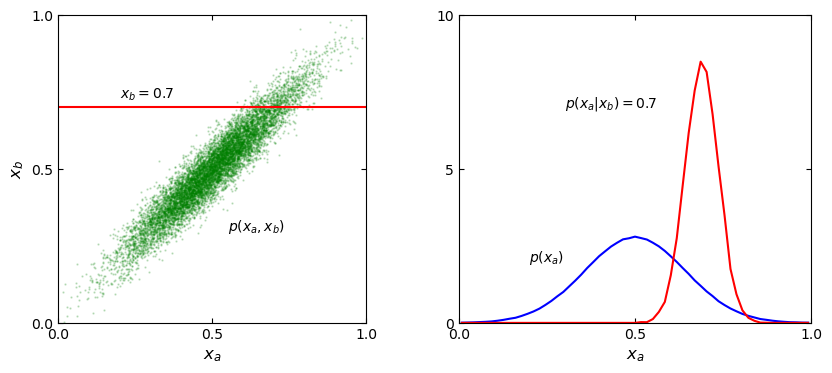

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(x[:10_000, 0], x[:10_000, 1], color='g', marker='.', s=2, alpha=0.2)
ax[0].axhline(y=0.7, color='r')
ax[0].text(0.2, 0.73, r'$x_b = 0.7$')
ax[0].text(0.55, 0.3, r'$p(x_a, x_b)$')
ax[0].set_xticks([0, 0.5, 1])
ax[0].set_yticks([0, 0.5, 1])
ax[0].axis('square')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel(r'$x_a$', fontsize=12)
ax[0].set_ylabel(r'$x_b$', fontsize=12)
ax[0].tick_params(direction='in', which='both', right=True, top=True)

ax[1].plot(x_marg, pdf_marg, 'b', label=r'$p(x_a)$')
ax[1].plot(x_cond, pdf_cond, 'r', label=r'$p(x_a|x_b)=0.7$')
ax[1].text(0.2, 2, r'$p(x_a)$')
ax[1].text(0.3, 7, r'$p(x_a|x_b) = 0.7$')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 10)
ax[1].set_xticks([0, 0.5, 1])
ax[1].set_yticks([0, 5, 10])
ax[1].set_xlabel(r'$x_a$', fontsize=12)
ax[1].tick_params(direction='in', which='both', right=True, top=True)

plt.show()

# Conditional distribution for $x_b = 0.5$

In [30]:
x_b = 0.5

In [31]:
idx = np.sqrt((x[:, 1] - x_b) ** 2) < 0.01
idx.sum()

55658

In [32]:
cond = x[idx, 0]

In [33]:
cond.mean()

0.49996313999071806

Calculate $μ_{a|b}$ based on (2.97)

In [34]:
μ[0] - (Λ[0, 0] ** (-1)) * Λ[0, 1] * (x_b - μ[1])  # (2.97)

0.5

In [35]:
cond.var()

0.0021961440973884186

In [36]:
Λ[0, 0] ** (-1)  # (2.73)

0.0021621621621621626

In [37]:
x_marg, pdf_marg = calculate_hist(marg)
x_cond, pdf_cond = calculate_hist(cond)

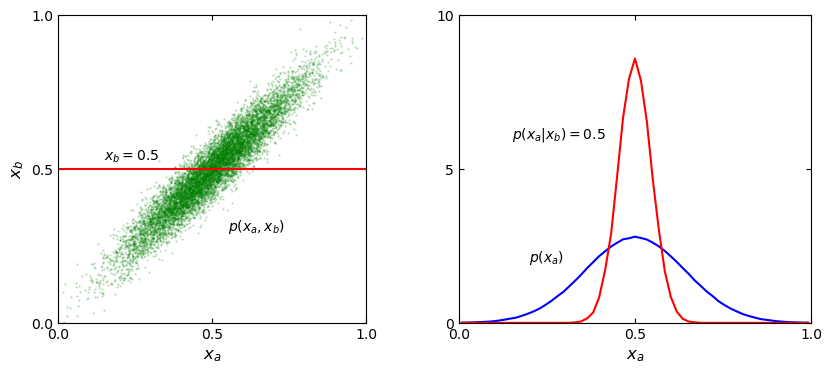

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(x[:10_000, 0], x[:10_000, 1], color='g', marker='.', s=2, alpha=0.2)
ax[0].axhline(y=0.5, color='r')
ax[0].text(0.55, 0.3, r'$p(x_a, x_b)$')
ax[0].text(0.15, 0.53, r'$x_b = 0.5$')
ax[0].set_xticks([0, 0.5, 1])
ax[0].set_yticks([0, 0.5, 1])
ax[0].axis('square')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].set_xlabel(r'$x_a$', fontsize=12)
ax[0].set_ylabel(r'$x_b$', fontsize=12)
ax[0].tick_params(direction='in', which='both', right=True, top=True)

ax[1].plot(x_marg, pdf_marg, 'b')
ax[1].plot(x_cond, pdf_cond, 'r')
ax[1].text(0.2, 2, r'$p(x_a)$')
ax[1].text(0.15, 6, r'$p(x_a|x_b) = 0.5$')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 10)
ax[1].set_xticks([0, 0.5, 1])
ax[1].set_yticks([0, 5, 10])
ax[1].set_xlabel(r'$x_a$', fontsize=12)
ax[1].tick_params(direction='in', which='both', right=True, top=True)

plt.show()